<a href="https://colab.research.google.com/github/sana1207/Chip-Sales-Project/blob/main/Correlation_Analysis_on_data_of_chip_sales_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing important packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv(r'd:\Users\Asus\Desktop\DataScience\QVI\Chips_Sales_Data.csv',encoding="ISO-8859-1")

In [ ]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD,SIZE
0,5/22/2019,28,28194,25683,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
1,12/28/2018,30,30230,27935,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
2,12/20/2018,32,32055,28318,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
3,3/25/2019,39,39013,34680,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
4,4/14/2019,39,39013,34683,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
5,2/9/2019,45,45076,40841,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
6,4/9/2019,45,45204,41573,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
7,7/20/2018,48,48049,43335,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
8,10/31/2018,50,50507,46686,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
9,3/7/2019,55,55141,49315,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g


### Checking missing data

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

DATE - 0.0%
STORE_NBR - 0.0%
LYLTY_CARD_NBR - 0.0%
TXN_ID - 0.0%
PROD_NBR - 0.0%
PROD_QTY - 0.0%
TOT_SALES - 0.0%
PROD - 0.0%
SIZE - 0.0%


### Extracting Data Types for Columns

In [ ]:
print(df.dtypes)

DATE               object
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_QTY            int64
TOT_SALES         float64
PROD               object
SIZE               object
dtype: object


### Looking into outiers

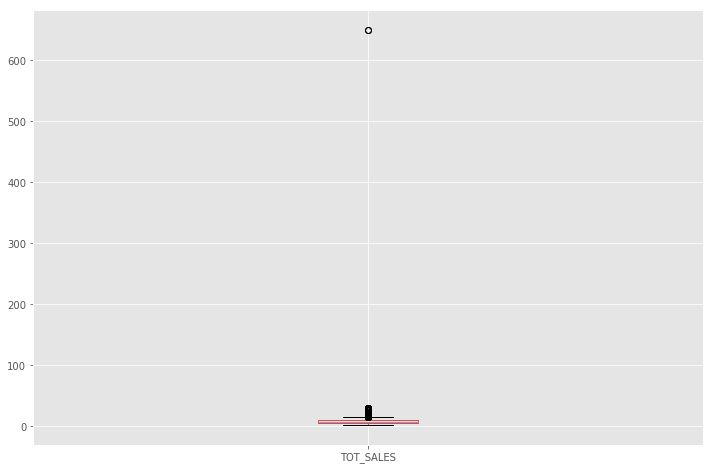

In [ ]:
df.boxplot(column=['TOT_SALES'])

In [ ]:
df.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD,SIZE
0,5/22/2019,28,28194,25683,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
1,12/28/2018,30,30230,27935,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
2,12/20/2018,32,32055,28318,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
3,3/25/2019,39,39013,34680,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
4,4/14/2019,39,39013,34683,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
5,2/9/2019,45,45076,40841,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
6,4/9/2019,45,45204,41573,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
7,7/20/2018,48,48049,43335,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
8,10/31/2018,50,50507,46686,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
9,3/7/2019,55,55141,49315,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g


### Order our Data by 'TOT_SALES' column

In [ ]:
df.sort_values(by=['TOT_SALES'], inplace=False, ascending=False)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD,SIZE
74003,8/19/2018,226,226000,226201,4,200,650.0,Dorito Corn Chp Supreme,380g
74004,5/20/2019,226,226000,226210,4,200,650.0,Dorito Corn Chp Supreme,380g
115396,8/17/2018,24,24095,20797,14,5,29.5,Smiths Crnkle Chip Orgnl Big Bag,380g
113375,8/15/2018,94,94148,93390,14,5,29.5,Smiths Crnkle Chip Orgnl Big Bag,380g
114747,5/19/2019,194,194308,194516,14,5,29.5,Smiths Crnkle Chip Orgnl Big Bag,380g
114166,8/15/2018,49,49303,45789,14,5,29.5,Smiths Crnkle Chip Orgnl Big Bag,380g
115574,5/20/2019,44,44350,40394,14,5,29.5,Smiths Crnkle Chip Orgnl Big Bag,380g
114007,5/14/2019,190,190113,190914,14,5,29.5,Smiths Crnkle Chip Orgnl Big Bag,380g
115152,5/20/2019,118,118021,120799,14,5,29.5,Smiths Crnkle Chip Orgnl Big Bag,380g
30250,8/17/2018,181,181129,183109,23,5,28.5,Cheezels Cheese,330g


### Regression Plot

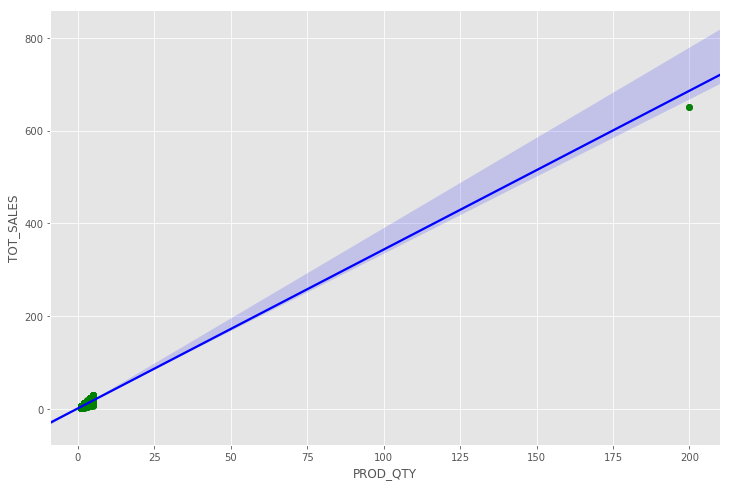

In [ ]:
sns.regplot(x="PROD_QTY", y="TOT_SALES", data=df, scatter_kws={"color":"green"},line_kws={"color":"blue"})

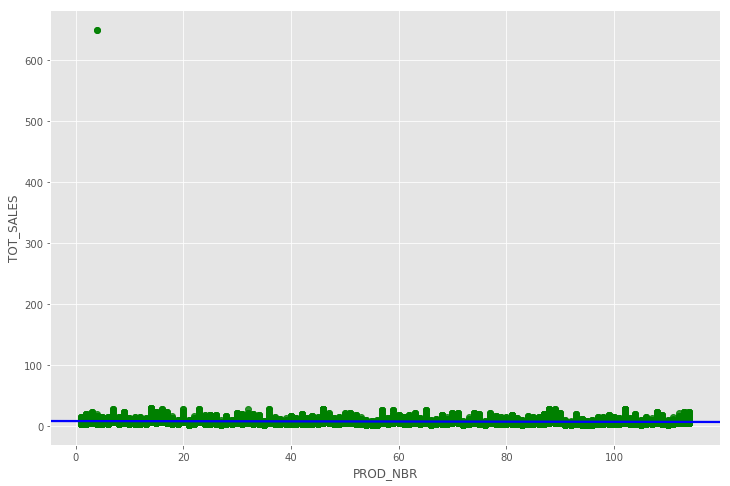

In [ ]:
sns.regplot(x="PROD_NBR", y="TOT_SALES", data=df,scatter_kws={"color":"green"},line_kws={"color":"blue"})

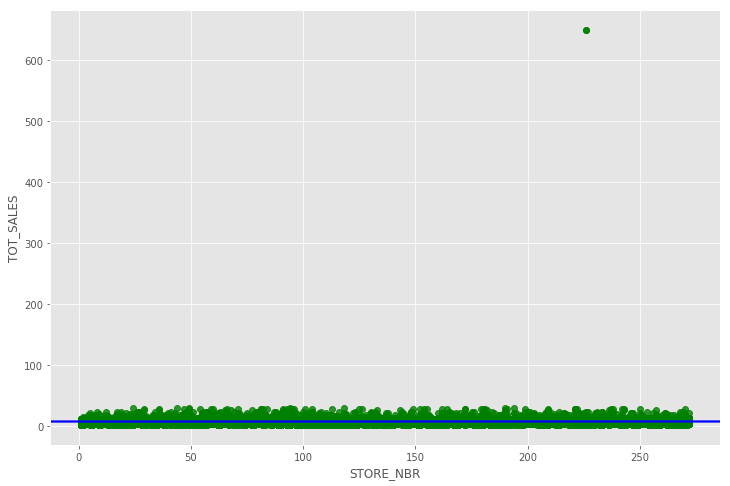

In [ ]:
sns.regplot(x="STORE_NBR", y="TOT_SALES", data=df,scatter_kws={"color":"green"},line_kws={"color":"blue"})

In [ ]:
df.corr(method ='pearson')

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234
LYLTY_CARD_NBR,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908
TXN_ID,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468
PROD_NBR,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851
PROD_QTY,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307
TOT_SALES,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000


In [ ]:
df.corr(method ='kendall')

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.996984,0.996988,0.001580,0.004587,0.000827
LYLTY_CARD_NBR,0.996984,1.000000,0.999795,0.001567,0.004432,0.000816
TXN_ID,0.996988,0.999795,1.000000,0.001618,0.004429,0.000783
PROD_NBR,0.001580,0.001567,0.001618,1.000000,-0.002056,-0.095804
PROD_QTY,0.004587,0.004432,0.004429,-0.002056,1.000000,0.401890
TOT_SALES,0.000827,0.000816,0.000783,-0.095804,0.401890,1.000000


In [ ]:
df.corr(method ='spearman')

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
STORE_NBR,1.000000,0.999553,0.999615,0.002346,0.005622,0.001240
LYLTY_CARD_NBR,0.999553,1.000000,0.999853,0.002333,0.005446,0.001227
TXN_ID,0.999615,0.999853,1.000000,0.002409,0.005442,0.001180
PROD_NBR,0.002346,0.002333,0.002409,1.000000,-0.002512,-0.140078
PROD_QTY,0.005622,0.005446,0.005442,-0.002512,1.000000,0.479661
TOT_SALES,0.001240,0.001227,0.001180,-0.140078,0.479661,1.000000


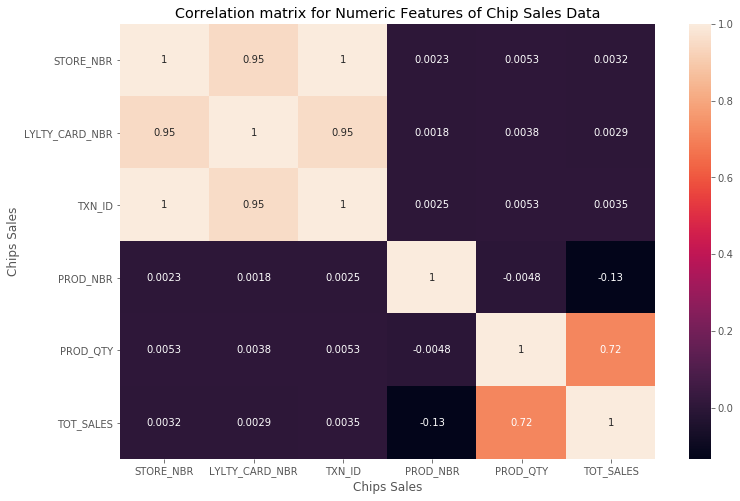

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features of Chip Sales Data")
plt.xlabel("Chips Sales")
plt.ylabel("Chips Sales")
plt.show()

In [ ]:
###factorize is used to assign a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD,SIZE
DATE,1.000000,0.002024,0.000373,0.003060,0.003191,0.064316,0.005033,0.003191,0.002582
STORE_NBR,0.002024,1.000000,0.269932,0.074857,0.073484,0.042896,0.100146,0.073484,-0.017761
LYLTY_CARD_NBR,0.000373,0.269932,1.000000,0.325194,0.319943,0.127988,0.181426,0.319943,0.085650
TXN_ID,0.003060,0.074857,0.325194,1.000000,0.974790,-0.005749,0.419549,0.974790,0.190773
PROD_NBR,0.003191,0.073484,0.319943,0.974790,1.000000,-0.007534,0.433050,1.000000,0.204522
PROD_QTY,0.064316,0.042896,0.127988,-0.005749,-0.007534,1.000000,0.030963,-0.007534,0.001911
TOT_SALES,0.005033,0.100146,0.181426,0.419549,0.433050,0.030963,1.000000,0.433050,0.545329
PROD,0.003191,0.073484,0.319943,0.974790,1.000000,-0.007534,0.433050,1.000000,0.204522
SIZE,0.002582,-0.017761,0.085650,0.190773,0.204522,0.001911,0.545329,0.204522,1.000000


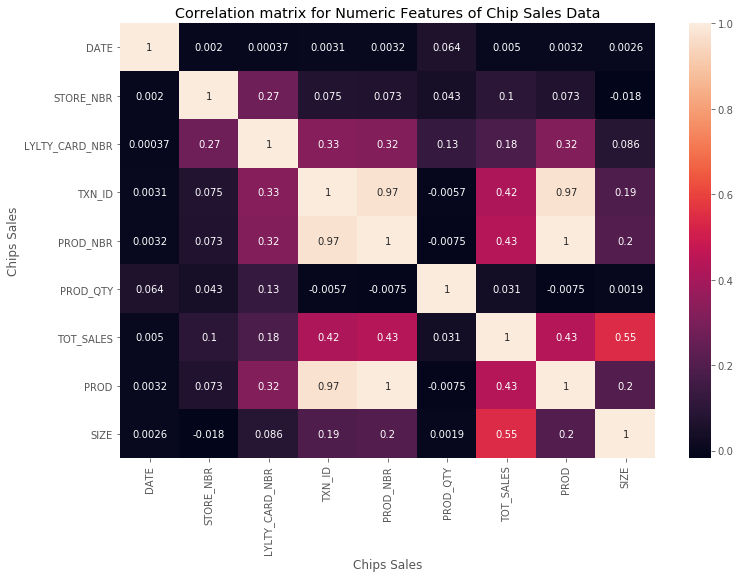

In [ ]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features of Chip Sales Data")
plt.xlabel("Chips Sales")
plt.ylabel("Chips Sales")
plt.show()

In [ ]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

DATE            DATE              1.000000
                STORE_NBR         0.002024
                LYLTY_CARD_NBR    0.000373
                TXN_ID            0.003060
                PROD_NBR          0.003191
                PROD_QTY          0.064316
                TOT_SALES         0.005033
                PROD              0.003191
                SIZE              0.002582
STORE_NBR       DATE              0.002024
                STORE_NBR         1.000000
                LYLTY_CARD_NBR    0.269932
                TXN_ID            0.074857
                PROD_NBR          0.073484
                PROD_QTY          0.042896
                TOT_SALES         0.100146
                PROD              0.073484
                SIZE             -0.017761
LYLTY_CARD_NBR  DATE              0.000373
                STORE_NBR         0.269932
                LYLTY_CARD_NBR    1.000000
                TXN_ID            0.325194
                PROD_NBR          0.319943
           

In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

SIZE            STORE_NBR        -0.017761
STORE_NBR       SIZE             -0.017761
PROD_QTY        PROD             -0.007534
PROD            PROD_QTY         -0.007534
PROD_NBR        PROD_QTY         -0.007534
PROD_QTY        PROD_NBR         -0.007534
                TXN_ID           -0.005749
TXN_ID          PROD_QTY         -0.005749
DATE            LYLTY_CARD_NBR    0.000373
LYLTY_CARD_NBR  DATE              0.000373
PROD_QTY        SIZE              0.001911
SIZE            PROD_QTY          0.001911
STORE_NBR       DATE              0.002024
DATE            STORE_NBR         0.002024
                SIZE              0.002582
SIZE            DATE              0.002582
TXN_ID          DATE              0.003060
DATE            TXN_ID            0.003060
                PROD              0.003191
PROD_NBR        DATE              0.003191
DATE            PROD_NBR          0.003191
PROD            DATE              0.003191
DATE            TOT_SALES         0.005033
TOT_SALES  

### High Correlation (>0.5)

In [ ]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

TOT_SALES       SIZE              0.545329
SIZE            TOT_SALES         0.545329
TXN_ID          PROD_NBR          0.974790
                PROD              0.974790
PROD            TXN_ID            0.974790
PROD_NBR        TXN_ID            0.974790
DATE            DATE              1.000000
PROD_NBR        PROD_NBR          1.000000
PROD            PROD_NBR          1.000000
TOT_SALES       TOT_SALES         1.000000
PROD_QTY        PROD_QTY          1.000000
PROD_NBR        PROD              1.000000
TXN_ID          TXN_ID            1.000000
LYLTY_CARD_NBR  LYLTY_CARD_NBR    1.000000
STORE_NBR       STORE_NBR         1.000000
PROD            PROD              1.000000
SIZE            SIZE              1.000000
dtype: float64


### Top 20 Stores by Sales

In [ ]:
CompanyGrossSum = df.groupby('STORE_NBR')[["TOT_SALES"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('TOT_SALES', ascending = False)[:20]
CompanyGrossSumSorted = CompanyGrossSumSorted['TOT_SALES'].astype('int64') 
CompanyGrossSumSorted

STORE_NBR
226    18905
88     16333
165    15973
40     15559
237    15539
58     15251
199    14797
4      14647
203    14551
26     14469
81     14361
201    14298
130    14289
72     14204
181    14108
217    13993
95     13915
261    13859
238    13708
210    13689
Name: TOT_SALES, dtype: int64

### Top 20 Products by Sales


In [ ]:
CompanyGrossSum = df.groupby('PROD_NBR')[["TOT_SALES"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('TOT_SALES', ascending = False)[:20]
CompanyGrossSumSorted = CompanyGrossSumSorted['TOT_SALES'].astype('int64') 
CompanyGrossSumSorted

PROD_NBR
4      40352
14     36367
16     34804
102    34457
7      34302
23     34296
20     33390
89     33031
46     32740
32     32588
88     32578
36     31271
65     30513
59     30237
57     30033
Name: TOT_SALES, dtype: int64

In [ ]:
df.groupby(['STORE_NBR', 'PROD_NBR'])[["TOT_SALES"]].sum()

TOT_SALES
STORE_NBR PROD_NBR           
1         1              11.6
          2              15.2
          3              27.6
          4              19.5
          5              21.0
          6              18.0
          7              28.5
          8              31.9
          9              32.2
          10             13.5
          11             21.0
          12             30.0
          13             24.3
          14             47.2
          15             18.4
          16             11.4
          17             41.4
          18              9.9
          19             20.8
          20             28.5
          21             20.9
          22             16.5
          23             57.0
          24             28.8
          25             44.4
          26             22.2
          27             13.3
          28              3.3
          29              6.0
          30             48.4
...                       ...
272       50             74.8
          51            101.2
          52             46.8
          57             91.8
          59             91.8
          60             69.0
          62             92.5
          63             96.6
          65             71.4
          68             81.4
          70             75.6
          71             68.8
          74             83.6
          75             68.4
          77             66.0
          78             95.7
          81             62.9
          87             91.2
          88             59.4
          89            102.6
          90             57.2
          93             74.1
          99             59.2
          102            70.2
          104            38.0
          108           110.4
          109            88.8
          112            50.4
          113           101.2
          114           101.2

[23081 rows x 1 columns]

In [ ]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD,SIZE
0,5/22/2019,28,28194,25683,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
1,12/28/2018,30,30230,27935,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
2,12/20/2018,32,32055,28318,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
3,3/25/2019,39,39013,34680,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g
4,4/14/2019,39,39013,34683,12,2,6.0,Natural Chip Co Tmato Hrb&Spce,175g


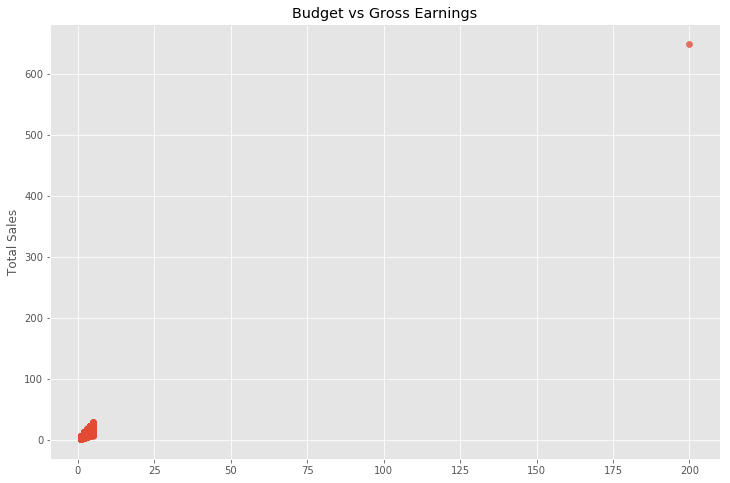

In [ ]:
plt.scatter(x=df['PROD_QTY'], y=df['TOT_SALES'], alpha=0.5)
plt.title('Product Quantity vs Total Sales')
plt.xlabel('Product Quantity')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized
df_numerized.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD,SIZE
0,225,28,28194,25683,12,2,6.0,45,10
1,111,30,30230,27935,12,2,6.0,45,10
2,104,32,32055,28318,12,2,6.0,45,10
3,167,39,39013,34680,12,2,6.0,45,10
4,186,39,39013,34683,12,2,6.0,45,10


In [ ]:
df_numerized.corr(method='pearson')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PROD,SIZE
DATE,1.000000,-0.001109,-0.000318,-0.001259,-0.002144,-0.014465,-0.012030,-0.000279,0.000084
STORE_NBR,-0.001109,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234,0.001150,0.001119
LYLTY_CARD_NBR,-0.000318,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908,0.000884,0.001753
TXN_ID,-0.001259,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468,0.001090,0.001159
PROD_NBR,-0.002144,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133851,0.114624,-0.144004
PROD_QTY,-0.014465,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715307,-0.007027,0.002774
TOT_SALES,-0.012030,0.003234,0.002908,0.003468,-0.133851,0.715307,1.000000,-0.203684,0.158796
PROD,-0.000279,0.001150,0.000884,0.001090,0.114624,-0.007027,-0.203684,1.000000,0.202235
SIZE,0.000084,0.001119,0.001753,0.001159,-0.144004,0.002774,0.158796,0.202235,1.000000


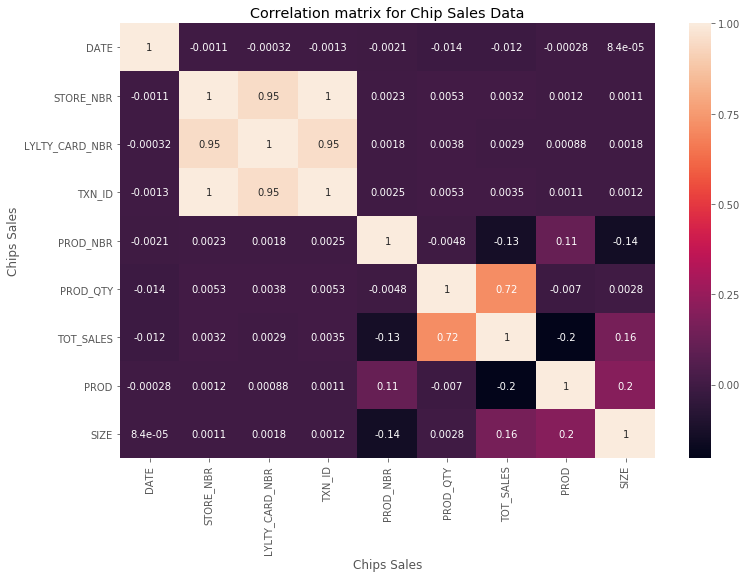

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Chip Sales Data")
plt.xlabel("Chips Sales")
plt.ylabel("Chips Sales")
plt.show()

### Result :  Total Sales is most correlated to product quantity